In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SENSORS_REFLECTIVITY_XLSX = '../data/sensor_reflectivity_qe_r+qe.xlsx'

In [3]:
df = pd.read_excel(SENSORS_REFLECTIVITY_XLSX)
df.head()


,Unnamed: 0,14.1-23.6 cone; based on forensic modeling (120321) of E2V test coating,Unnamed: 2,Unnamed: 3
0,wavelength[nm],reflectivity,QE,QE+reflectivity
1,300,0.733275,0.211573,0.944848
2,300.1,0.731736,0.212922,0.944658
3,300.2,0.730188,0.214281,0.944469
4,300.3,0.728631,0.215647,0.944278


In [4]:
keys = df.keys()
df_r = df.rename(columns={keys[0]: "wavelength", keys[1]: "reflectivity",
                    keys[2]: "QE", keys[3]: "sum_qe_r"})
data = df_r.iloc[1: , :]
data.head()

,wavelength,reflectivity,QE,sum_qe_r
1,300,0.733275,0.211573,0.944848
2,300.1,0.731736,0.212922,0.944658
3,300.2,0.730188,0.214281,0.944469
4,300.3,0.728631,0.215647,0.944278
5,300.4,0.727064,0.217021,0.944085


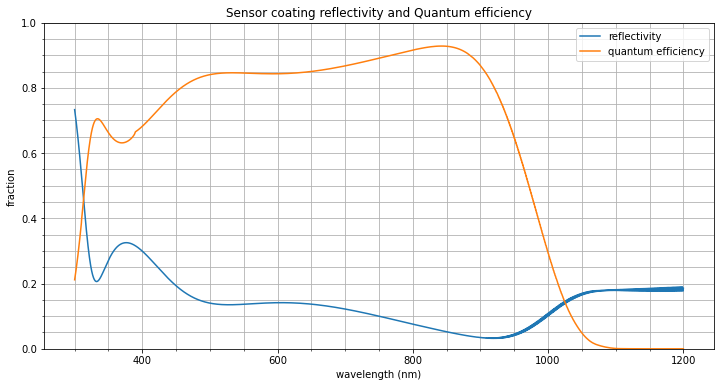

In [5]:
plt.rcParams["figure.figsize"] = [12, 6]
fig, ax = plt.subplots(1, 1)
ref, = ax.plot(data['wavelength'], data['reflectivity'], label='reflectivity')
qe, = ax.plot(data['wavelength'], data['QE'], label='quantum efficiency')
ax.set_title('Sensor coating reflectivity and Quantum efficiency')
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('fraction')
ax.set_ylim([0, 1])
ax.grid(which='both')
ax.minorticks_on()
plt.legend(handles = [ref, qe])
